In [7]:
import importlib
import qsim
importlib.reload(qsim)

<module 'qsim' from '/home/akshay/akshaygit/QCS/quantum_computer_simulator/qsim.py'>

{'1': 1000}


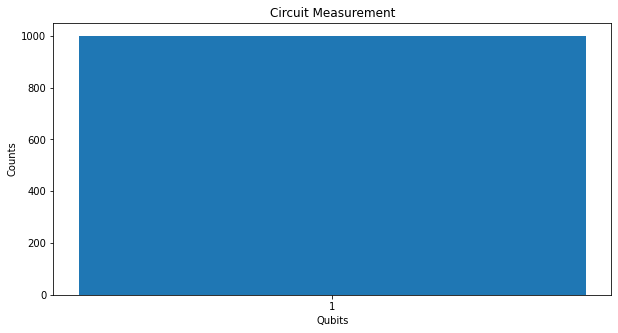

In [8]:
# Circuit 1
# Angeles in Radians 
my_circuit = [
{ "gate": "u3", "params": { "theta": 3.1415, "phi": 1.5708, "lamb": -3.1415 }, "target": [0] }
]

total_qubits = 1
my_qpu = qsim.get_ground_state(total_qubits)

# Run circuit

final_state = qsim.run_program(total_qubits,my_qpu, my_circuit)

# Read results

counts = qsim.get_counts(total_qubits,final_state, 1000)

print(counts)
qsim.plot_readings(counts);


{'1': 1000}


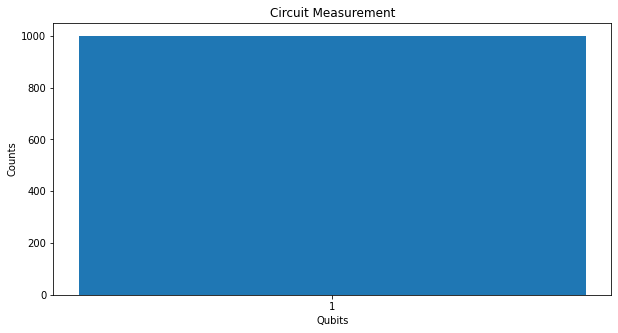

In [10]:
# Circuit 2
# Angeles in Radians 
my_circuit = [
{ "gate": "u3", "params": { "theta": "global_1", "phi": "global_2", "lamb": -3.1415 }, "target": [0] }
]

total_qubits = 1
my_qpu = qsim.get_ground_state(total_qubits)

# Run circuit

final_state = qsim.run_program(total_qubits,my_qpu, my_circuit, { "global_1": 3.1415, "global_2": 1.5708 })

# Read results

counts = qsim.get_counts(total_qubits,final_state, 1000)

print(counts)
qsim.plot_readings(counts);


{'000': 513, '101': 487}


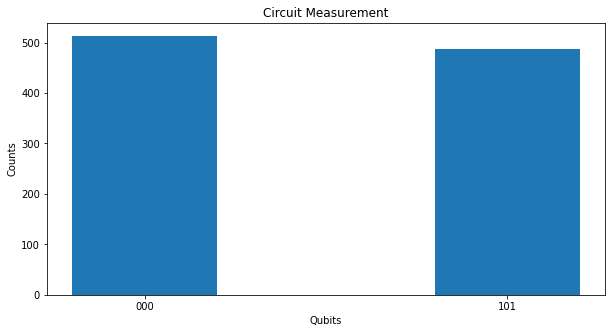

In [45]:
# Circuit 3

my_circuit = [
{ "gate": "h", "target": [0] ,"params":0}, 
{ "gate": "cx", "target": [0,2] ,"params":0} 
]
total_qubits = 3
my_qpu = qsim.get_ground_state(total_qubits)
# Run circuit

final_state = qsim.run_program(total_qubits,my_qpu, my_circuit)

# Read results

counts = qsim.get_counts(total_qubits,final_state, 1000)

print(counts)
qsim .plot_readings(counts);


{'00000': 264, '00100': 226, '11000': 275, '11100': 235}


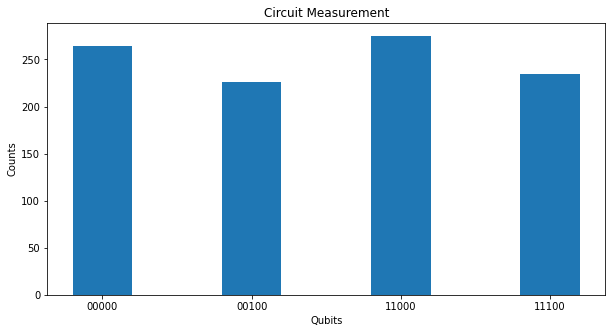

In [46]:
# Circuit 4

my_circuit = [
{ "gate": "h", "target": [0] ,"params":0}, 
{ "gate": "cx", "target": [0, 1] ,"params":0},
    { "gate": "h", "target": [2],"params":0} 
]
total_qubits = 5
my_qpu = qsim.get_ground_state(total_qubits)

# Run circuit

final_state = qsim.run_program(total_qubits,my_qpu, my_circuit)

# Read results

counts = qsim.get_counts(total_qubits,final_state, 1000)

print(counts)
qsim.plot_readings(counts);
